### Apply ML algorithms

- Linear Regression
- Lasso Regression
- Decision Tree Regressor
- KNN Regressor
- RandomForestRegressor
- Xgboost Regressor
- Hyperparameter Tuning
- ANN- Artificial Neural Network

# **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

# **Reading Dataset**

In [ ]:
df=pd.read_csv('/content/Real_Combine.csv')

# **Dataset Description**
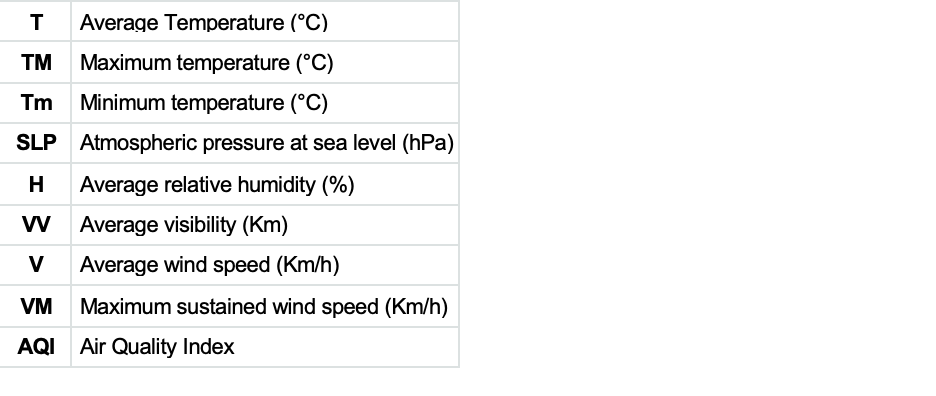

In [ ]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [ ]:
df.shape

(1093, 9)

In [ ]:
df=df.dropna()

In [ ]:
X=df.iloc[:,:-1] ## independent features
y=df.iloc[:,-1] ## dependent features

In [ ]:
type(X)

pandas.core.frame.DataFrame

# **Checking for Null Values**

In [ ]:
## check null values
X.isnull()

,T,TM,Tm,SLP,H,VV,V,VM
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
1088,False,False,False,False,False,False,False,False
1089,False,False,False,False,False,False,False,False
1090,False,False,False,False,False,False,False,False
1091,False,False,False,False,False,False,False,False


In [ ]:
y.isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1088    False
1089    False
1090    False
1091    False
1092    False
Name: PM 2.5, Length: 1092, dtype: bool

# **Exploratory Data Analysis**

In [ ]:
def scatterplot_input_output(x, y, xlab, ylab):
  plt.scatter(x, y, color='green')
  plt.xlabel(xlab)
  plt.ylabel(ylab)

  axes = plt.gca()
  m, b = np.polyfit(x, y, 1)
  X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
  plt.plot(X_plot, m*X_plot + b, '-')
  plt.show()


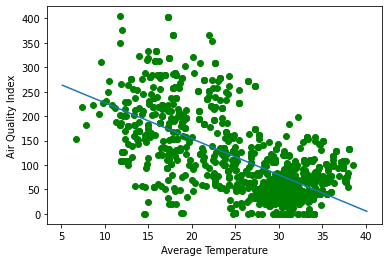

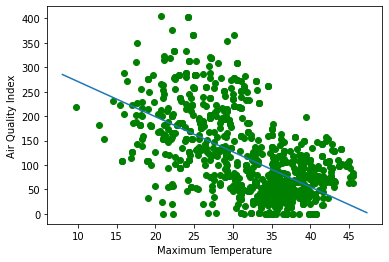

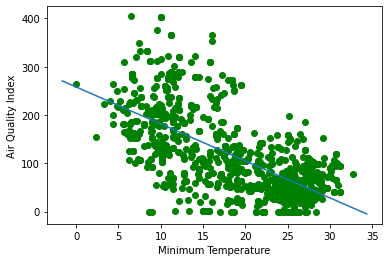

In [ ]:
scatterplot_input_output(df['T'], df['PM 2.5'],'Average Temperature','Air Quality Index')
scatterplot_input_output(df['TM'], df['PM 2.5'], 'Maximum Temperature','Air Quality Index')
scatterplot_input_output(df['Tm'], df['PM 2.5'], 'Minimum Temperature','Air Quality Index')

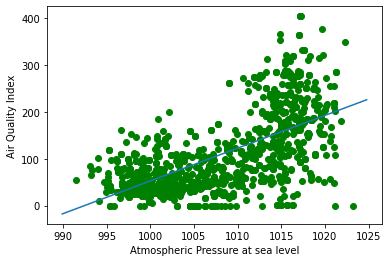

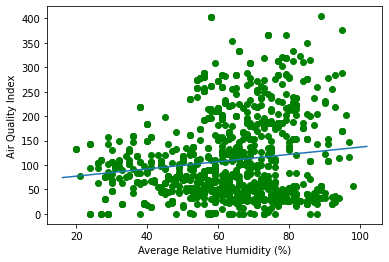

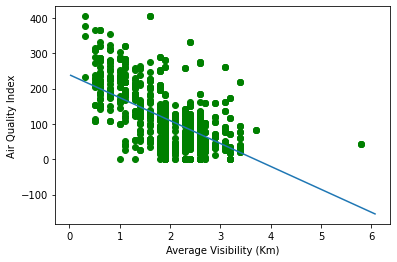

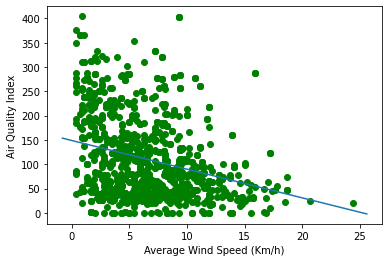

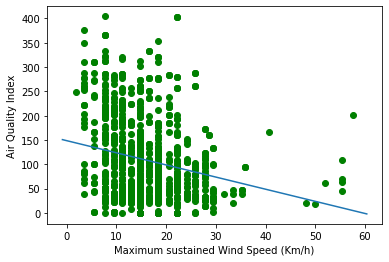

In [ ]:
scatterplot_input_output(df['SLP'], df['PM 2.5'], 'Atmospheric Pressure at sea level','Air Quality Index')
scatterplot_input_output(df['H'], df['PM 2.5'], 'Average Relative Humidity (%)','Air Quality Index')
scatterplot_input_output(df['VV'], df['PM 2.5'], 'Average Visibility (Km)','Air Quality Index')
scatterplot_input_output(df['V'], df['PM 2.5'], 'Average Wind Speed (Km/h)','Air Quality Index')
scatterplot_input_output(df['VM'],df['PM 2.5'], 'Maximum sustained Wind Speed (Km/h)','Air Quality Index')


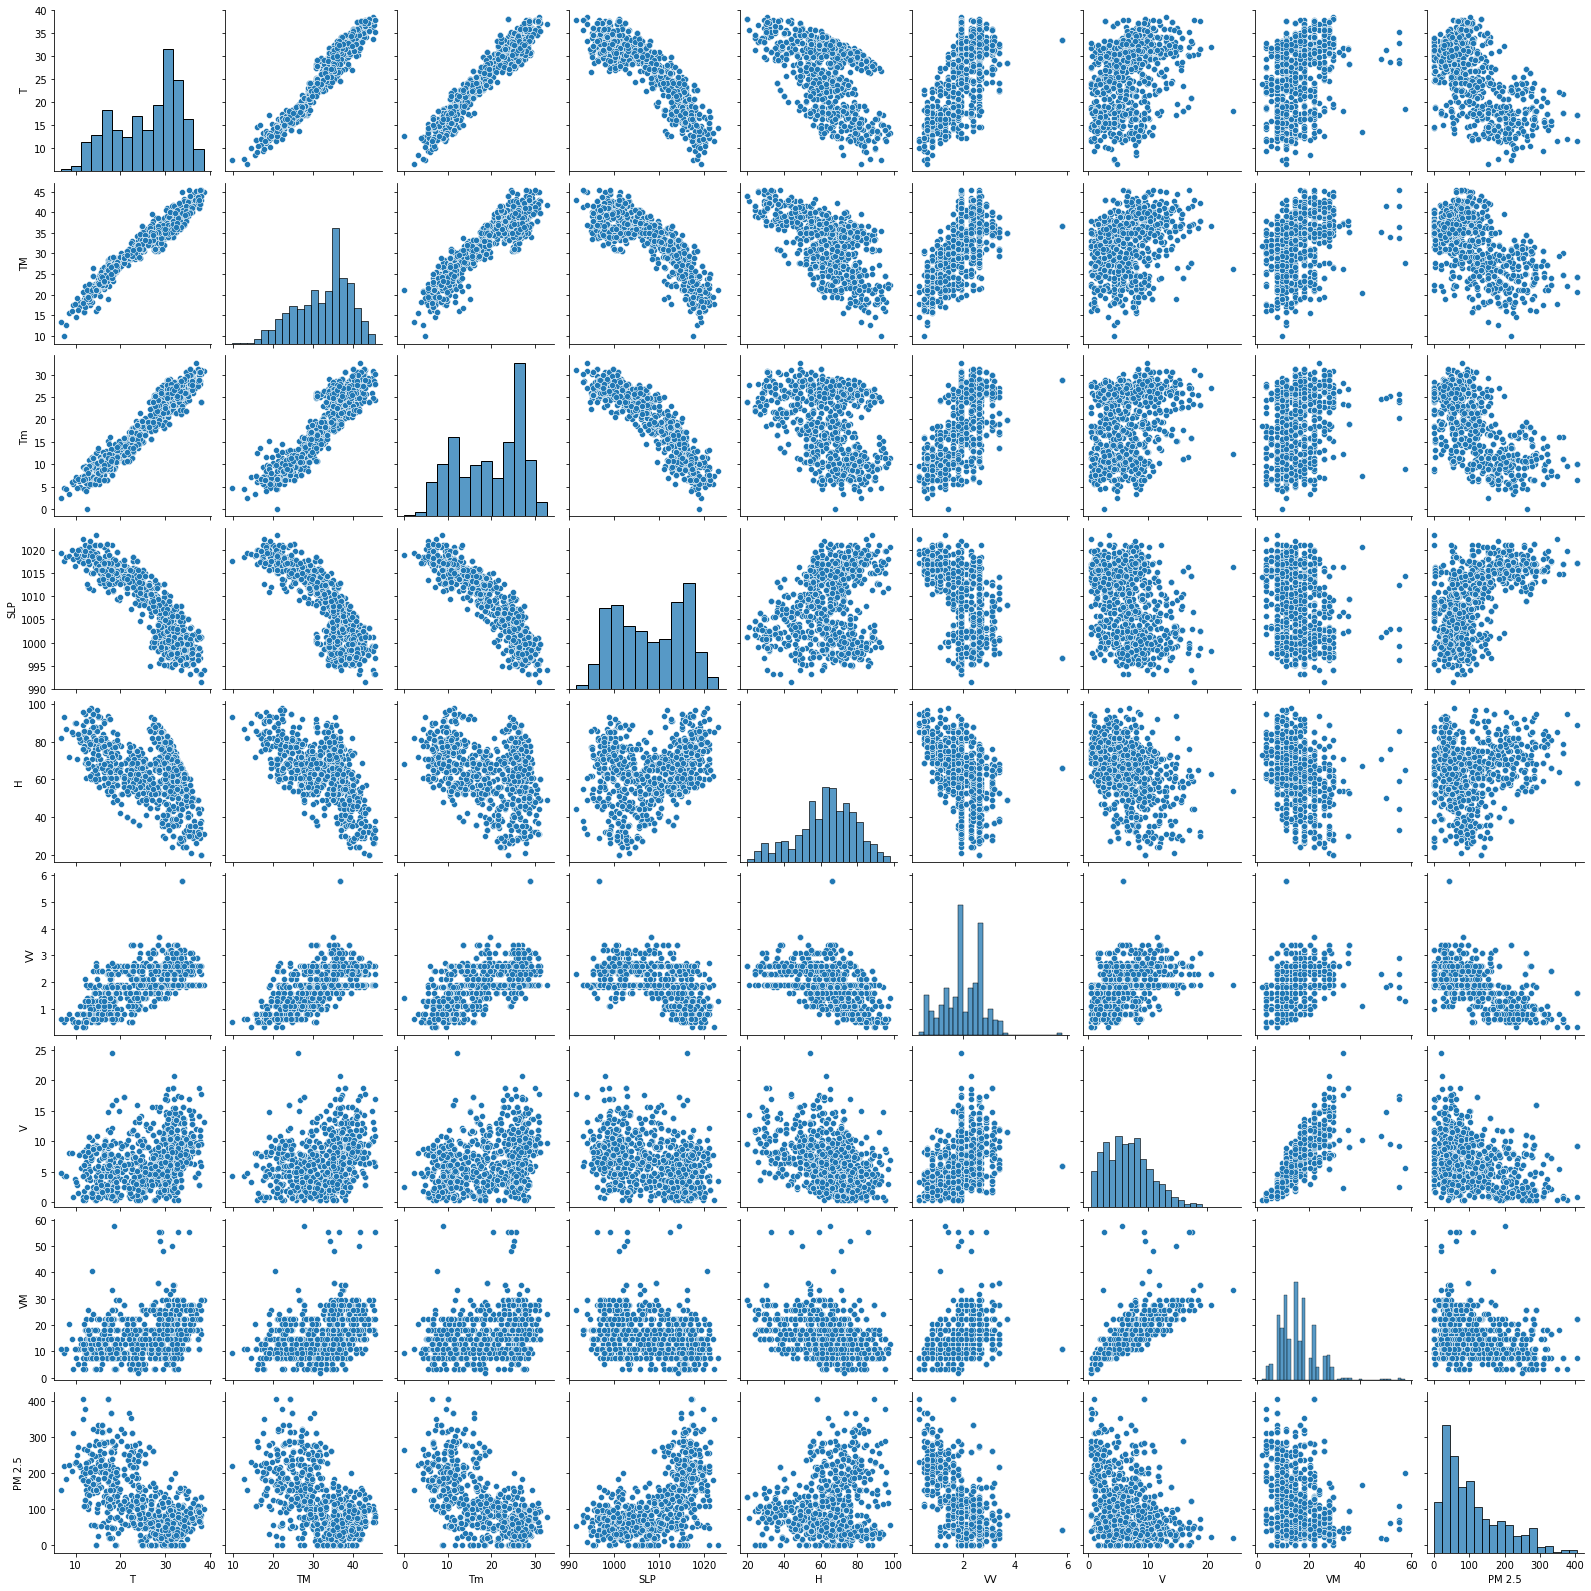

In [ ]:
sns.pairplot(df)

In [ ]:
df.corr()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.967536,0.953719,-0.881409,-0.509299,0.640792,0.301994,0.287738,-0.631462
TM,0.967536,1.000000,0.892031,-0.822958,-0.586681,0.606945,0.292949,0.297011,-0.568409
Tm,0.953719,0.892031,1.000000,-0.917518,-0.287357,0.577240,0.296225,0.266782,-0.673824
SLP,-0.881409,-0.822958,-0.917518,1.000000,0.240256,-0.517915,-0.329838,-0.310704,0.623187
H,-0.509299,-0.586681,-0.287357,0.240256,1.000000,-0.465374,-0.380575,-0.362177,0.138005
VV,0.640792,0.606945,0.577240,-0.517915,-0.465374,1.000000,0.376873,0.342442,-0.573941
V,0.301994,0.292949,0.296225,-0.329838,-0.380575,0.376873,1.000000,0.775655,-0.268530
VM,0.287738,0.297011,0.266782,-0.310704,-0.362177,0.342442,0.775655,1.000000,-0.215854
PM 2.5,-0.631462,-0.568409,-0.673824,0.623187,0.138005,-0.573941,-0.268530,-0.215854,1.000000


### Correlation Matrix with Heatmap
Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

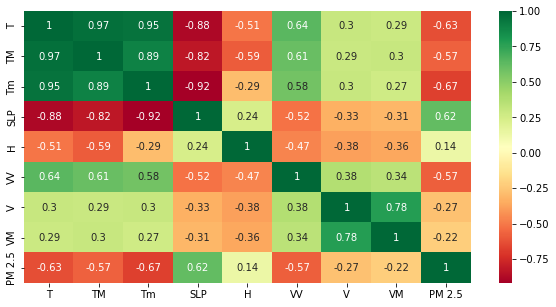

In [ ]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,5))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
corrmat.index

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')

# **Feature Importance and Engineering**
You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Regressor, we will be using Extra Tree Regressor for extracting the top 10 features for the dataset.

In [ ]:
# lets create some extra features from existing features to improve our Model
# Adding Vsquare
X['V square'] = X['V']* X['V']


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [ ]:
X.head()

,T,TM,Tm,SLP,H,VV,V,VM,V square
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,18.49
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,19.36
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,23.04
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,65.61
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,75.69


In [ ]:
print(model.feature_importances_)

[0.18265223 0.1209626  0.20302683 0.12419389 0.08534071 0.17030937
 0.03892259 0.03846362 0.03612817]


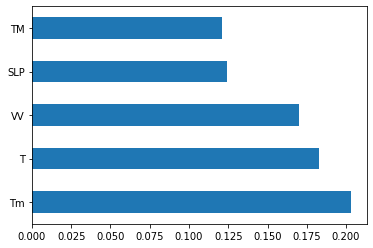

In [ ]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [ ]:
X=X.drop(['TM', 'VM', 'V square'],axis=1)

In [ ]:
X.head()

,T,Tm,SLP,H,VV,V
0,7.4,4.8,1017.6,93.0,0.5,4.3
1,7.8,4.4,1018.5,87.0,0.6,4.4
2,6.7,2.4,1019.4,82.0,0.6,4.8
3,8.6,3.3,1018.7,72.0,0.8,8.1
4,12.4,4.4,1017.3,61.0,1.3,8.7


### Linear Regression

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


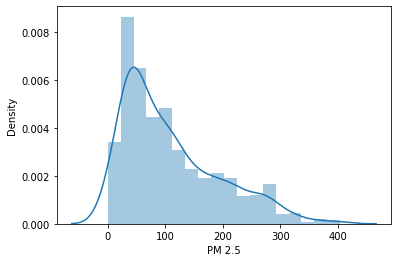

In [ ]:
sns.distplot(y)

 Train Test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
#Coefficients obtained for regression model
regressor.coef_

array([ -1.95161534,  -4.26578295,  -0.08122038,  -1.2275341 ,
       -38.14178317,  -1.61431316])

In [ ]:
regressor.intercept_

488.30881721488646

#### Model Evaluation

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
T,-1.951615
Tm,-4.265783
SLP,-0.081220
H,-1.227534
VV,-38.141783
V,-1.614313


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in T is associated with an *decrease of 1.95 in AQI PM2.5 *.
- Holding all other features fixed, a 1 unit increase in Tm is associated with an *decrease of 4.26 in AQI PM 2.5 *.


In [ ]:
pred_lr=regressor.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


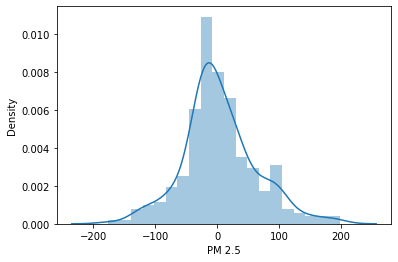

In [ ]:
sns.distplot(y_test-pred_lr)

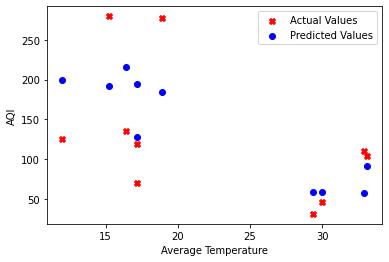

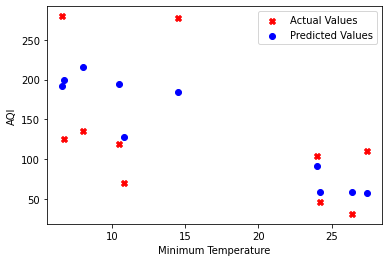

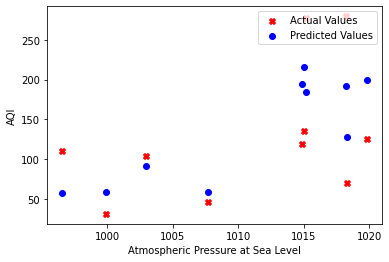

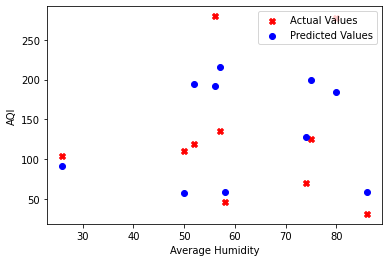

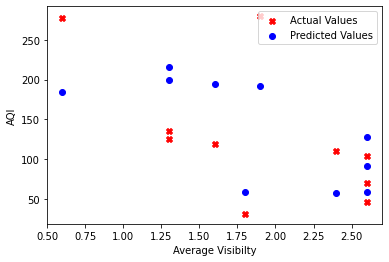

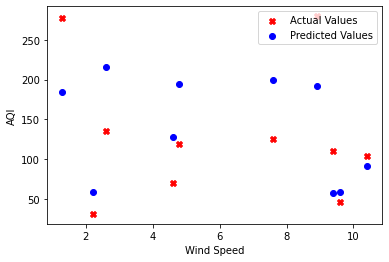

In [ ]:
#fetching 10 inputs and outputs for visualisations
X_test_sample=X_test.iloc[:10,:]
y_test_sample= y_test.iloc[:10]
pred_sample= pred_lr[0:10]


def sc_2(x, xlab):
  plt.scatter(x, y_test_sample, color='red', marker='X')
  plt.scatter(x, pred_sample, color='blue')
  #plt.title(title)
  plt.xlabel(xlab)
  plt.ylabel('AQI')
  plt.legend(["Actual Values", "Predicted Values"], loc ="upper right")
  plt.show()


sc_2(X_test_sample['T'], 'Average Temperature')
sc_2(X_test_sample['Tm'], 'Minimum Temperature')
sc_2(X_test_sample['SLP'], 'Atmospheric Pressure at Sea Level')
sc_2(X_test_sample['H'], 'Average Humidity')
sc_2(X_test_sample['VV'], 'Average Visibilty')
sc_2(X_test_sample['V'], 'Wind Speed')


In [ ]:
from sklearn import metrics


In [ ]:
#Without hyperParameter tuning
print('MAE:', metrics.mean_absolute_error(y_test, pred_lr))
print('MSE:', metrics.mean_squared_error(y_test, pred_lr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_lr)))
print('R-squared value:', metrics.r2_score(y_test, pred_lr))


MAE: 44.03447896615914
MSE: 3526.621351028783
RMSE: 59.385363104293496
R-squared value: 0.5238091124313212


## Ridge and Lasso Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [ ]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [ ]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 40}
-3635.3368247913086


In [ ]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.432e+06, tolerance: 6.146e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.580e+06, tolerance: 6.790e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

{'alpha': 1}
-3641.8941301883874


In [ ]:
pred_lasso=lasso_regressor.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


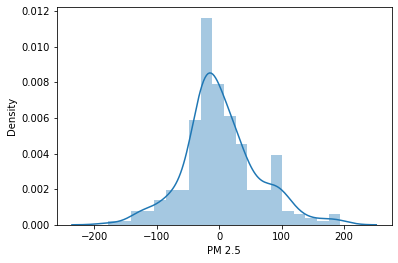

In [ ]:
sns.distplot(y_test-pred_lasso)

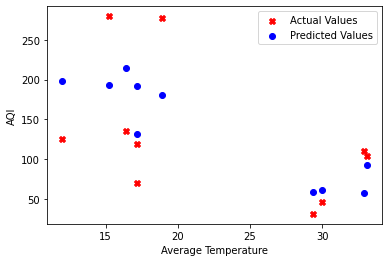

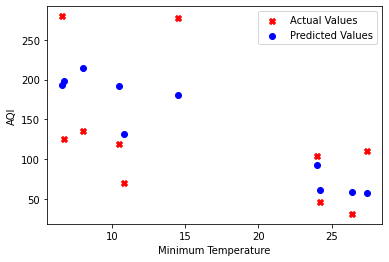

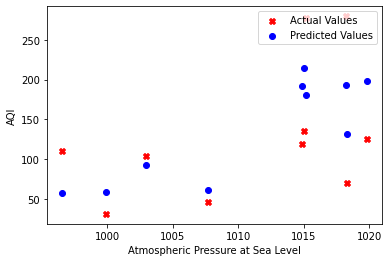

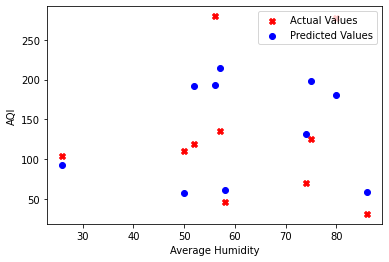

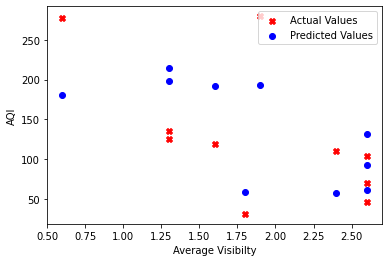

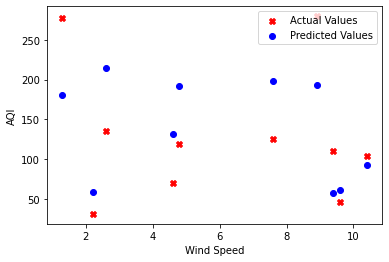

In [ ]:
#fetching 10 inputs and outputs for visualisations
#X_test_sample=X_test.iloc[:10,:]
#y_test_sample= y_test.iloc[:10]
pred_sample= pred_lasso[0:10]

sc_2(X_test_sample['T'], 'Average Temperature')
sc_2(X_test_sample['Tm'], 'Minimum Temperature')
sc_2(X_test_sample['SLP'], 'Atmospheric Pressure at Sea Level')
sc_2(X_test_sample['H'], 'Average Humidity')
sc_2(X_test_sample['VV'], 'Average Visibilty')
sc_2(X_test_sample['V'], 'Wind Speed')


In [ ]:
#Ridge-Lasso Regression
print('MAE:', metrics.mean_absolute_error(y_test, pred_lasso))
print('MSE:', metrics.mean_squared_error(y_test, pred_lasso))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_lasso)))
print('R-squared value:', metrics.r2_score(y_test, pred_lasso))

MAE: 44.01764704720999
MSE: 3509.0572813763797
RMSE: 59.23729637125904
R-squared value: 0.5261807449613223


# **Decision Tree Regressor**

In [ ]:
dtree=DecisionTreeRegressor(criterion="mse")
dtree.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


DecisionTreeRegressor(criterion='mse')

In [ ]:
pred_dt=dtree.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


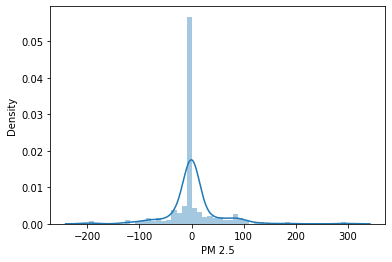

In [ ]:
sns.distplot(y_test-pred_dt)

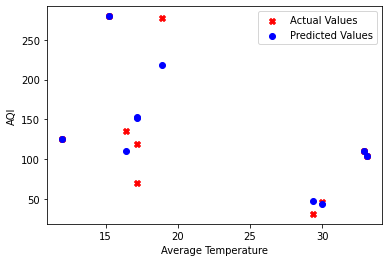

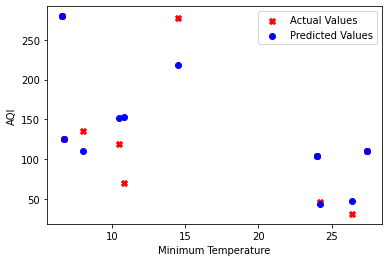

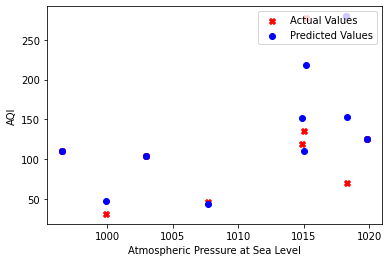

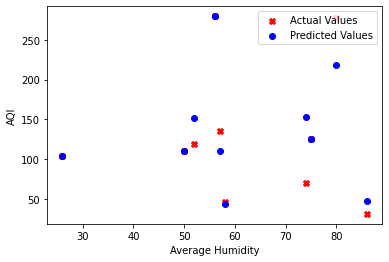

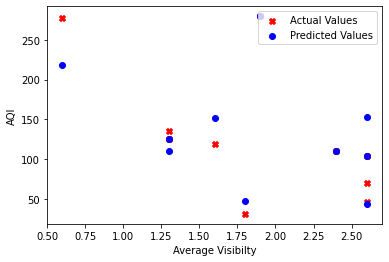

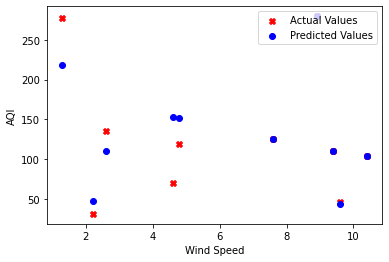

In [ ]:
pred_sample= pred_dt[0:10]

sc_2(X_test_sample['T'], 'Average Temperature')
sc_2(X_test_sample['Tm'], 'Minimum Temperature')
sc_2(X_test_sample['SLP'], 'Atmospheric Pressure at Sea Level')
sc_2(X_test_sample['H'], 'Average Humidity')
sc_2(X_test_sample['VV'], 'Average Visibilty')
sc_2(X_test_sample['V'], 'Wind Speed')

In [ ]:
#without hyperparameter tuning
print('MAE:', metrics.mean_absolute_error(y_test, pred_dt))
print('MSE:', metrics.mean_squared_error(y_test, pred_dt))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_dt)))
print('R-squared value:', metrics.r2_score(y_test, pred_dt))

MAE: 23.267857142857142
MSE: 2140.145754858567
RMSE: 46.26170938106986
R-squared value: 0.7110214550719642


### Hyperparameter Tuning Decision Tree Regressor

In [ ]:
## Hyper Parameter Optimization
params={
 "splitter"    : ["best","random"] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_samples_leaf" : [ 1,2,3,4,5 ],
"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
 "max_features" : ["auto","log2","sqrt",None ],
    "max_leaf_nodes":[None,10,20,30,40,50,60,70]
}

random_search=GridSearchCV(dtree,param_grid=params,scoring='neg_mean_squared_error',n_jobs=-1,cv=10,verbose=3)

In [ ]:
random_search.fit(X,y)

random_search.best_score_

Fitting 10 folds for each of 10240 candidates, totalling 102400 fits


/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


-3135.12318286555

In [ ]:
random_search.best_params_

{'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': 10,
 'min_samples_leaf': 2,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [ ]:
pred_dt_ht=random_search.predict(X_test)

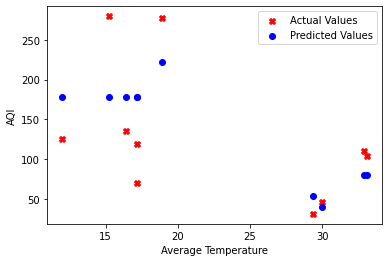

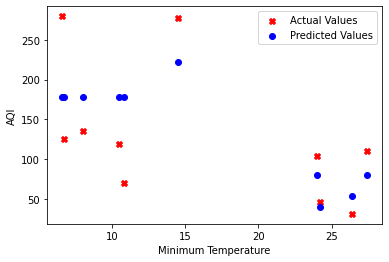

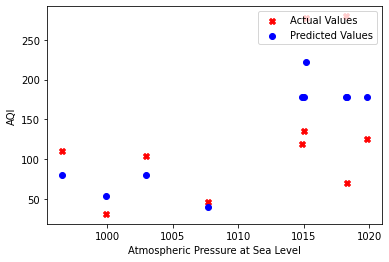

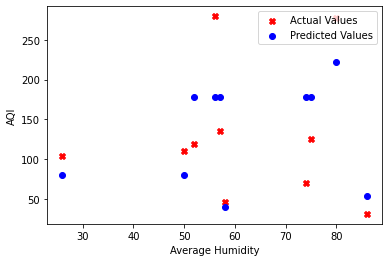

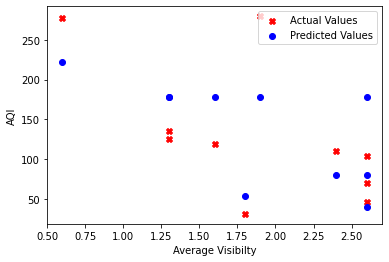

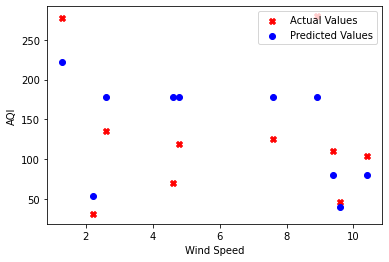

In [ ]:
pred_sample= pred_dt_ht[0:10]

sc_2(X_test_sample['T'], 'Average Temperature')
sc_2(X_test_sample['Tm'], 'Minimum Temperature')
sc_2(X_test_sample['SLP'], 'Atmospheric Pressure at Sea Level')
sc_2(X_test_sample['H'], 'Average Humidity')
sc_2(X_test_sample['VV'], 'Average Visibilty')
sc_2(X_test_sample['V'], 'Wind Speed')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


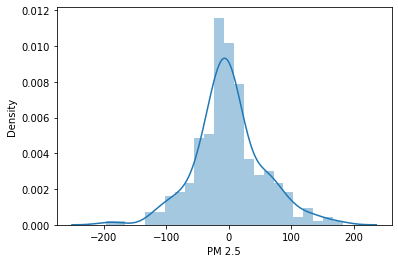

In [ ]:
sns.distplot(y_test-pred_dt_ht)

In [ ]:
#With hyperParameter tuning
print('MAE:', metrics.mean_absolute_error(y_test, pred_dt_ht))
print('MSE:', metrics.mean_squared_error(y_test, pred_dt_ht))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_dt_ht)))
print('R-squared value:', metrics.r2_score(y_test, pred_dt_ht))

MAE: 39.9577829601377
MSE: 3019.2737378217125
RMSE: 54.94791841209012
R-squared value: 0.5923149955957976


# **K Nearest Neighbor Regression**

In [ ]:
regressor=KNeighborsRegressor(n_neighbors=1)
regressor.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=1)

In [ ]:
pred_knn=regressor.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


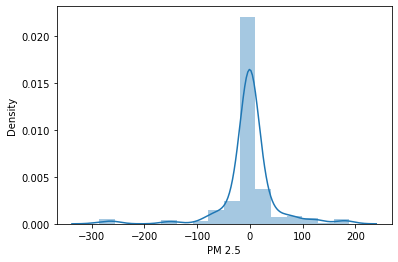

In [ ]:
sns.distplot(y_test-pred_knn)

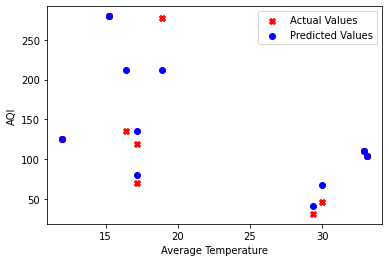

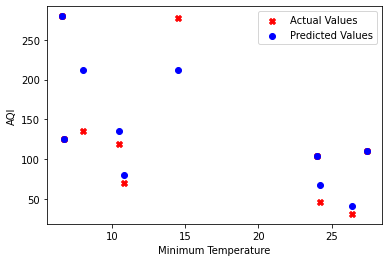

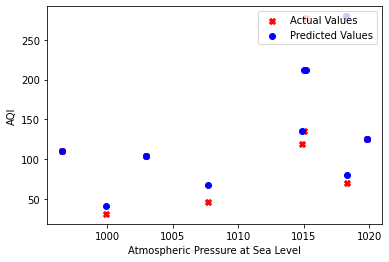

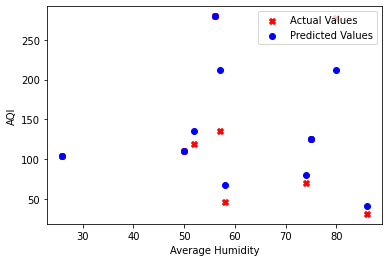

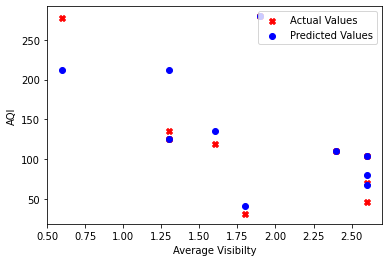

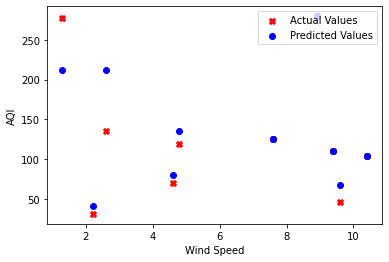

In [ ]:
pred_sample= pred_knn[0:10]

sc_2(X_test_sample['T'], 'Average Temperature')
sc_2(X_test_sample['Tm'], 'Minimum Temperature')
sc_2(X_test_sample['SLP'], 'Atmospheric Pressure at Sea Level')
sc_2(X_test_sample['H'], 'Average Humidity')
sc_2(X_test_sample['VV'], 'Average Visibilty')
sc_2(X_test_sample['V'], 'Wind Speed')

In [ ]:
#without hyperparameter tuning and N=1
print('MAE:', metrics.mean_absolute_error(y_test, pred_knn))
print('MSE:', metrics.mean_squared_error(y_test, pred_knn))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_knn)))
print('R-squared value:', metrics.r2_score(y_test, pred_knn))

MAE: 23.626953601953602
MSE: 2729.628400997151
RMSE: 52.245845777412306
R-squared value: 0.6314250832105004


## KNN with K=3


In [ ]:
from sklearn.model_selection import cross_val_score
accuracy_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsRegressor(n_neighbors=i)
    score=cross_val_score(knn,X,y,cv=10,scoring="neg_mean_squared_error")
    accuracy_rate.append(score.mean())

Text(0, 0.5, 'Accuracy Rate')

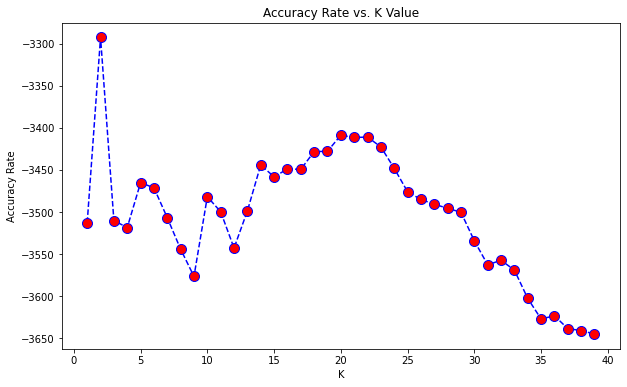

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
#plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
 #        markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

In [ ]:

knn = KNeighborsRegressor(n_neighbors=3)

knn.fit(X_train,y_train)
pred_knn_3 = knn.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


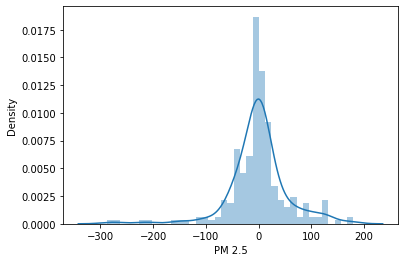

In [ ]:
sns.distplot(y_test-pred_knn_3)

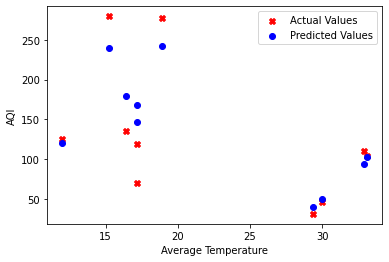

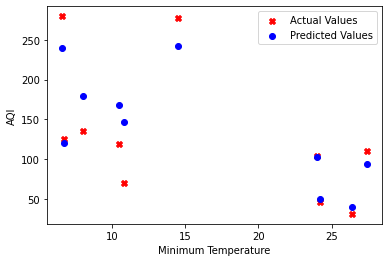

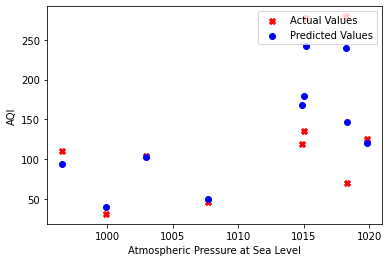

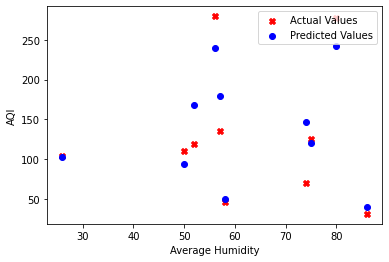

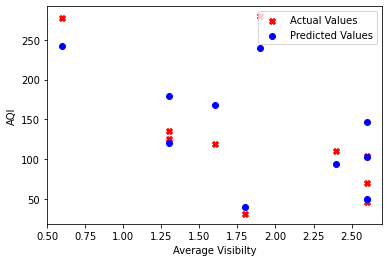

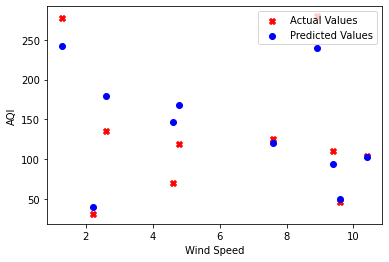

In [ ]:
pred_sample= pred_knn_3[0:10]

sc_2(X_test_sample['T'], 'Average Temperature')
sc_2(X_test_sample['Tm'], 'Minimum Temperature')
sc_2(X_test_sample['SLP'], 'Atmospheric Pressure at Sea Level')
sc_2(X_test_sample['H'], 'Average Humidity')
sc_2(X_test_sample['VV'], 'Average Visibilty')
sc_2(X_test_sample['V'], 'Wind Speed')

In [ ]:
#with hyperparameter tuning and N=3
print('MAE:', metrics.mean_absolute_error(y_test, pred_knn_3))
print('MSE:', metrics.mean_squared_error(y_test, pred_knn_3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_knn_3)))
print('R-squared value:', metrics.r2_score(y_test, pred_knn_3))

MAE: 35.05054945054945
MSE: 3192.6326786844843
RMSE: 56.50338643554459
R-squared value: 0.5689067700732795


# **Random Forest Regressor**

In [ ]:
regressor=RandomForestRegressor()
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
pred_rf=regressor.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


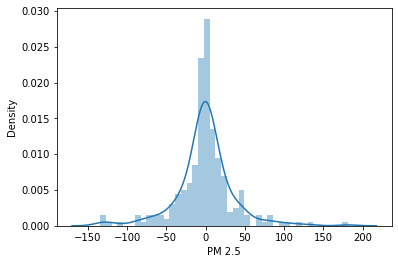

In [ ]:
sns.distplot(y_test-pred_rf)

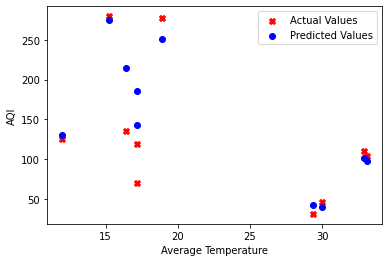

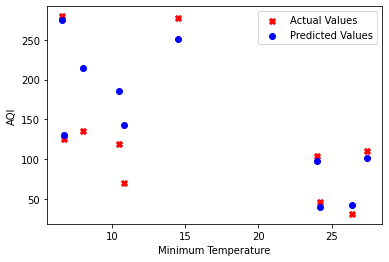

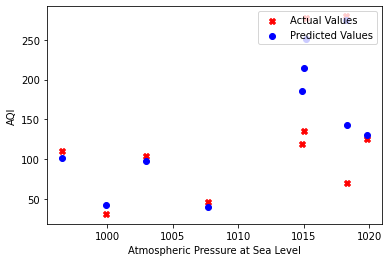

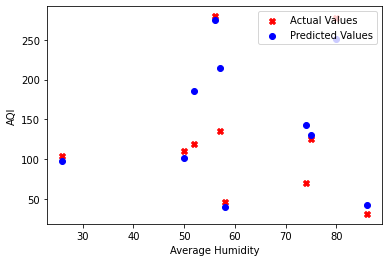

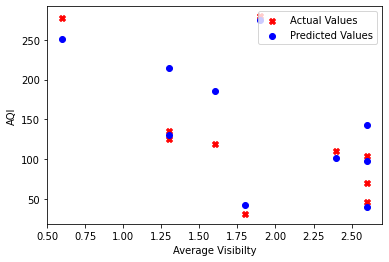

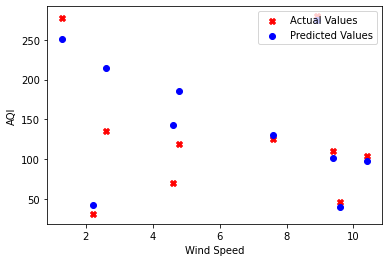

In [ ]:
pred_sample= pred_rf[0:10]

sc_2(X_test_sample['T'], 'Average Temperature')
sc_2(X_test_sample['Tm'], 'Minimum Temperature')
sc_2(X_test_sample['SLP'], 'Atmospheric Pressure at Sea Level')
sc_2(X_test_sample['H'], 'Average Humidity')
sc_2(X_test_sample['VV'], 'Average Visibilty')
sc_2(X_test_sample['V'], 'Wind Speed')

In [ ]:
#without hyperparameter tuning
print('MAE:', metrics.mean_absolute_error(y_test, pred_rf))
print('MSE:', metrics.mean_squared_error(y_test, pred_rf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_rf)))
print('R-squared value:', metrics.r2_score(y_test, pred_rf))

MAE: 23.00544902319903
MSE: 1351.528906159761
RMSE: 36.763146031858604
R-squared value: 0.8175064217735778


## Hyperparameter Tuning

In [ ]:
RandomForestRegressor()

RandomForestRegressor()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [ ]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree
# bootstrap = [True, False]

In [ ]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [ ]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid,scoring='neg_mean_squared_error', 
                               n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [ ]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.6s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_es

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
rf_random.best_params_

{'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

In [ ]:
rf_random.best_score_

-1404.6338835246568

In [ ]:
pred_rf_ht=rf_random.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


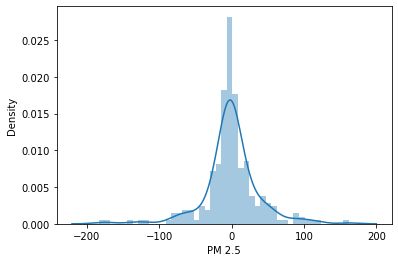

In [ ]:
sns.distplot(y_test-pred_rf_ht)

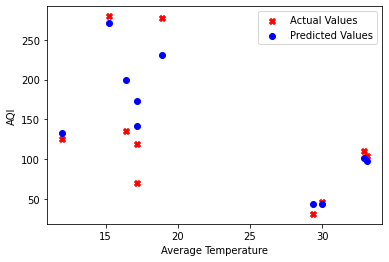

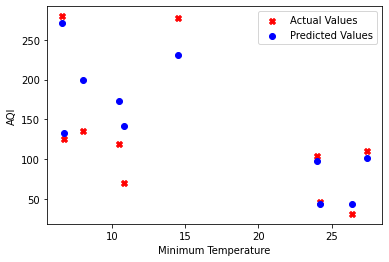

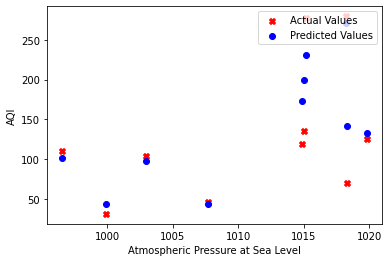

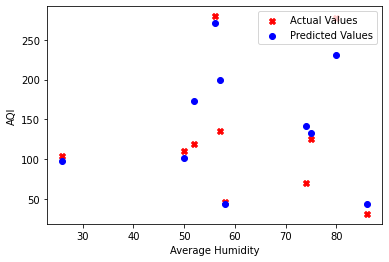

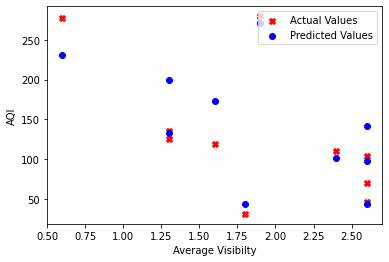

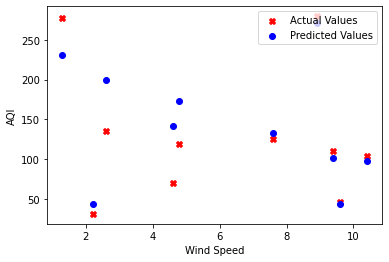

In [ ]:
pred_sample= pred_rf_ht[0:10]

sc_2(X_test_sample['T'], 'Average Temperature')
sc_2(X_test_sample['Tm'], 'Minimum Temperature')
sc_2(X_test_sample['SLP'], 'Atmospheric Pressure at Sea Level')
sc_2(X_test_sample['H'], 'Average Humidity')
sc_2(X_test_sample['VV'], 'Average Visibilty')
sc_2(X_test_sample['V'], 'Wind Speed')

In [ ]:
#with hyper parameter tuning
print('MAE:', metrics.mean_absolute_error(y_test, pred_rf_ht))
print('MSE:', metrics.mean_squared_error(y_test, pred_rf_ht))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_rf_ht)))
print('R-squared value:', metrics.r2_score(y_test, pred_rf_ht))

MAE: 23.796816009704557
MSE: 1485.4790508165775
RMSE: 38.54191291070771
R-squared value: 0.7994194677388117


# **XGBoost Regressor**

In [ ]:
regressor=xgb.XGBRegressor()
regressor.fit(X_train,y_train)

[21:37:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
pred_xg=regressor.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


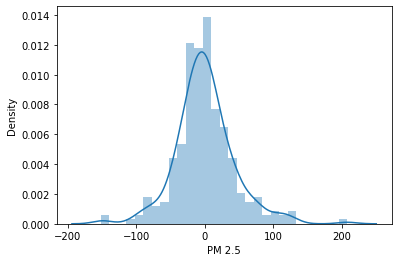

In [ ]:
sns.distplot(y_test-pred_xg)

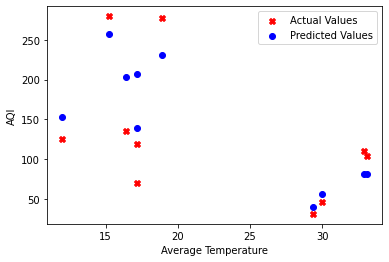

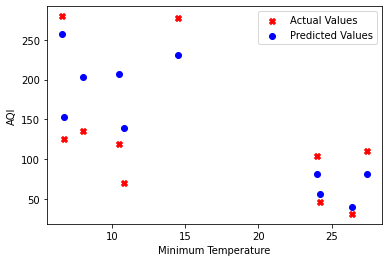

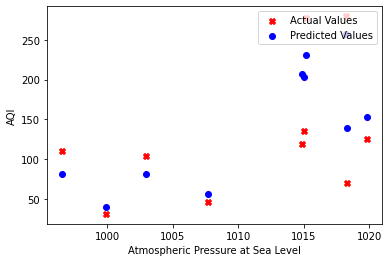

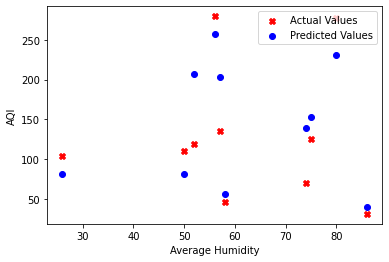

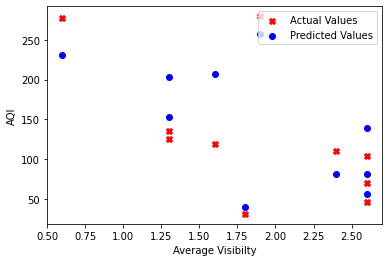

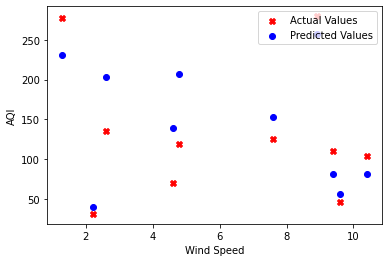

In [ ]:
pred_sample= pred_xg[0:10]

sc_2(X_test_sample['T'], 'Average Temperature')
sc_2(X_test_sample['Tm'], 'Minimum Temperature')
sc_2(X_test_sample['SLP'], 'Atmospheric Pressure at Sea Level')
sc_2(X_test_sample['H'], 'Average Humidity')
sc_2(X_test_sample['VV'], 'Average Visibilty')
sc_2(X_test_sample['V'], 'Wind Speed')

In [ ]:
#without hyperparameter tuning
print('MAE:', metrics.mean_absolute_error(y_test, pred_xg))
print('MSE:', metrics.mean_squared_error(y_test, pred_xg))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_xg)))
print('R-squared value:', metrics.r2_score(y_test, pred_xg))

MAE: 30.804291507408877
MSE: 1871.634955055649
RMSE: 43.26239654776015
R-squared value: 0.7472777988505862


## Hyperparameter Tuning

In [ ]:
xgb.XGBRegressor()

XGBRegressor()

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [ ]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Various learning rate parameters
learning_rate = ['0.05','0.1', '0.2','0.3','0.5','0.6']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
#Subssample parameter values
subsample=[0.7,0.6,0.8]
# Minimum child weight parameters
min_child_weight=[3,4,5,6,7]

In [ ]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'min_child_weight': min_child_weight}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': ['0.05', '0.1', '0.2', '0.3', '0.5', '0.6'], 'max_depth': [5, 10, 15, 20, 25, 30], 'subsample': [0.7, 0.6, 0.8], 'min_child_weight': [3, 4, 5, 6, 7]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
regressor=xgb.XGBRegressor()

In [ ]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
xg_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid,scoring='neg_mean_squared_error', 
                               n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [ ]:
xg_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[21:37:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   0.7s
[21:37:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   1.0s
[21:37:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   0.8s
[21:37:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, sub

RandomizedSearchCV(cv=5, estimator=XGBRegressor(), n_iter=100, n_jobs=1,
                   param_distributions={'learning_rate': ['0.05', '0.1', '0.2',
                                                          '0.3', '0.5', '0.6'],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'min_child_weight': [3, 4, 5, 6, 7],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200],
                                        'subsample': [0.7, 0.6, 0.8]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
xg_random.best_params_

{'learning_rate': '0.05',
 'max_depth': 20,
 'min_child_weight': 3,
 'n_estimators': 800,
 'subsample': 0.7}

In [ ]:
xg_random.best_score_

-1302.8175158185568

In [ ]:
pred_xg_ht=xg_random.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


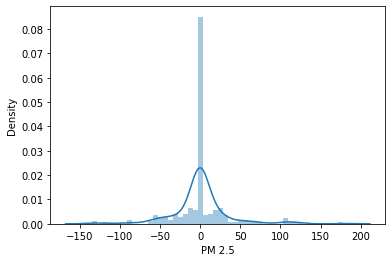

In [ ]:
sns.distplot(y_test-pred_xg_ht)

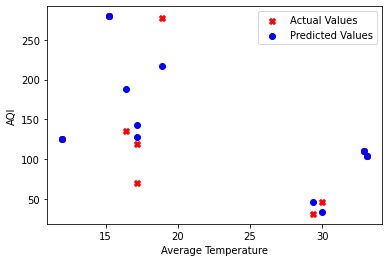

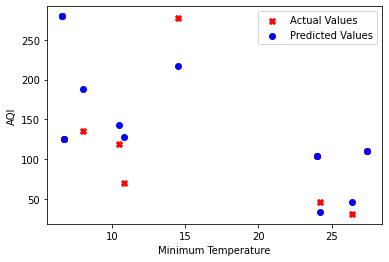

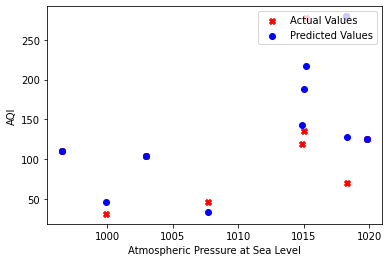

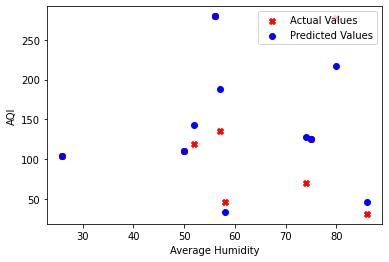

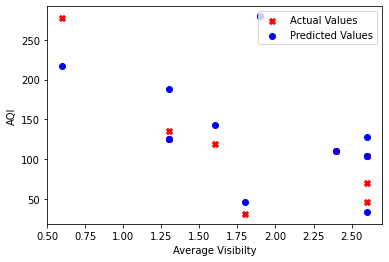

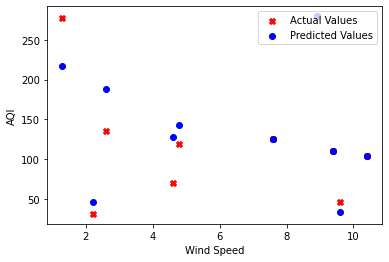

In [ ]:
pred_sample= pred_xg_ht[0:10]

sc_2(X_test_sample['T'], 'Average Temperature')
sc_2(X_test_sample['Tm'], 'Minimum Temperature')
sc_2(X_test_sample['SLP'], 'Atmospheric Pressure at Sea Level')
sc_2(X_test_sample['H'], 'Average Humidity')
sc_2(X_test_sample['VV'], 'Average Visibilty')
sc_2(X_test_sample['V'], 'Wind Speed')

In [ ]:
#with hyperparameter tuning
print('MAE:', metrics.mean_absolute_error(y_test, pred_xg_ht))
print('MSE:', metrics.mean_squared_error(y_test, pred_xg_ht))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_xg_ht)))
print('R-squared value:', metrics.r2_score(y_test, pred_xg_ht))

MAE: 17.563885925642882
MSE: 1164.0763966424574
RMSE: 34.11856381271723
R-squared value: 0.8428176667298817


# **ANN**

In [ ]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

# Fitting the ANN to the Training set
model_history=NN_model.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 10)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               896       
                                                                 
 dense_6 (Dense)             (None, 256)               33024     
                                                                 
 dense_7 (Dense)             (None, 256)               65792     
                                                                 
 dense_8 (Dense)             (None, 256)               65792     
                                                                 
 dense_9 (Dense)             (None, 1)                 257       
                                                                 
Total params: 165,761
Trainable params: 165,761
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
55/55 [==============================

In [ ]:
pred_nn=NN_model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


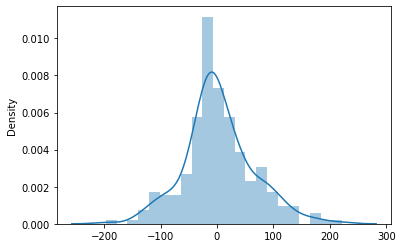

In [ ]:
sns.distplot(y_test.values.reshape(-1,1)-pred_nn)

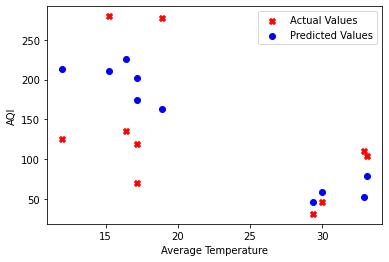

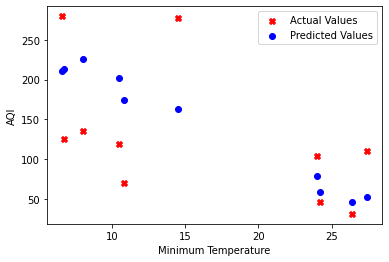

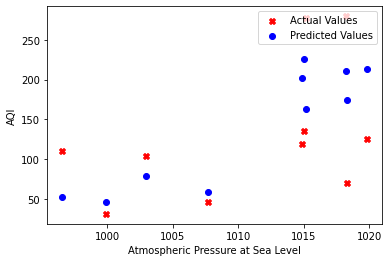

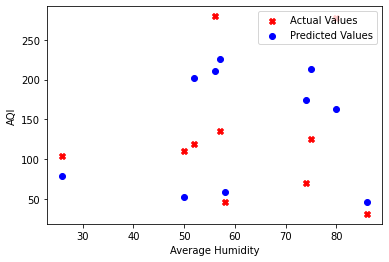

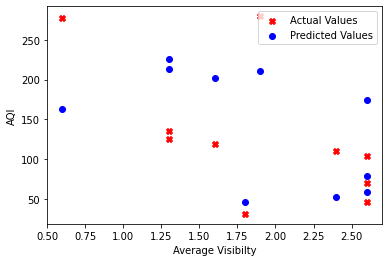

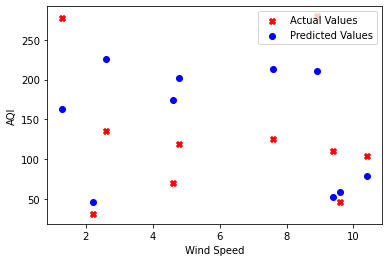

In [ ]:
pred_sample= pred_nn[0:10]

sc_2(X_test_sample['T'], 'Average Temperature')
sc_2(X_test_sample['Tm'], 'Minimum Temperature')
sc_2(X_test_sample['SLP'], 'Atmospheric Pressure at Sea Level')
sc_2(X_test_sample['H'], 'Average Humidity')
sc_2(X_test_sample['VV'], 'Average Visibilty')
sc_2(X_test_sample['V'], 'Wind Speed')

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_nn))
print('MSE:', metrics.mean_squared_error(y_test, pred_nn))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_nn)))
print('R-squared value:', metrics.r2_score(y_test, pred_nn))

MAE: 45.435159173203914
MSE: 3795.6473191535547
RMSE: 61.60882501033074
R-squared value: 0.487483206758747
